### Bedtools Post Hoc Analysis

In [1]:
import pandas as pd
import math
import scipy
import numpy as np
import pyranges as pr
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
hg_pop = pd.read_csv('igsr_samples.csv')  
d = pd.DataFrame()
dir = '/home/oona/nsf_grfp/all_bed/intersect'

for bed_file in os.listdir(dir):
    filename = os.path.join(dir, bed_file)
    intersect = pr.read_bed(filename, as_df=True)
    switch_cnt = intersect.groupby(['BlockCount'])['ThickStart'].count().reset_index(name="count")
    merged_df = pd.merge(intersect, switch_cnt, on=['BlockCount', 'BlockCount'], how='inner')
    merged_df['HGNum'] = os.path.basename(filename)
    d = pd.concat([d, merged_df])

FileNotFoundError: [Errno 2] No such file or directory: 'igsr_samples.csv'

In [3]:
d['HGNum'] = d['HGNum'].str.replace('_intersect.bed', '', regex=True)
d.to_csv('switch_counts.zip', compression='gzip')

In [9]:
hg_total = pd.merge(d, hg_pop, left_on='HGNum', right_on='Sample name')

In [42]:
hg_total

,Chromosome,Start,End,Name,Score,Strand,ThickStart,ThickEnd,ItemRGB,BlockCount,...,HGNum,Sample name,Sex,Biosample ID,Population code,Population name,Superpopulation code,Superpopulation name,Population elastic ID,Data collections
0,10,846753,1213641,10,104427,3682002,EUR,0.00394585144562,7.44839483137,seg104427,...,HG00551,HG00551,female,SAME124252,PUR,Puerto Rican,AMR,American Ancestry,PUR,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1,10,846753,1213641,10,104427,21384152,EUR,0.00394585144562,46.2485470489,seg104427,...,HG00551,HG00551,female,SAME124252,PUR,Puerto Rican,AMR,American Ancestry,PUR,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
2,10,5815256,5986638,10,104427,21384152,EUR,0.00394585144562,46.2485470489,seg104427,...,HG00551,HG00551,female,SAME124252,PUR,Puerto Rican,AMR,American Ancestry,PUR,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
3,10,7692940,8051225,10,104427,21384152,EUR,0.00394585144562,46.2485470489,seg104427,...,HG00551,HG00551,female,SAME124252,PUR,Puerto Rican,AMR,American Ancestry,PUR,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
4,10,17079734,17589283,10,104427,21384152,EUR,0.00394585144562,46.2485470489,seg104427,...,HG00551,HG00551,female,SAME124252,PUR,Puerto Rican,AMR,American Ancestry,PUR,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6278920,9,117236525,117511629,9,115787041,117387673,AFR,136.161077,139.544838,seg115787041,...,NA20412,NA20412,female,SAME124002,ASW,African Ancestry SW,AFR,African Ancestry,ASW,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
6278921,9,116967656,117019640,9,115787041,117387673,AFR,136.161077,139.544838,seg115787041,...,NA20412,NA20412,female,SAME124002,ASW,African Ancestry SW,AFR,African Ancestry,ASW,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
6278922,9,115716092,116272367,9,115787041,117387673,AFR,136.161077,139.544838,seg115787041,...,NA20412,NA20412,female,SAME124002,ASW,African Ancestry SW,AFR,African Ancestry,ASW,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
6278923,9,117236525,117511629,9,117389478,117697660,UNK,139.561071,139.724686,seg117389478,...,NA20412,NA20412,female,SAME124002,ASW,African Ancestry SW,AFR,African Ancestry,ASW,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."


In [34]:
plot = hg_total[hg_total['count'] > 1]

In [35]:
plot = plot.groupby(['Population code', ''])['count'].sum()
plot = plot.to_frame()

In [40]:
plot

,count
Population code,
ACB,1511310534
ASW,135558148
CLM,82449504
MXL,25088571
PEL,95377755
PUR,119485784


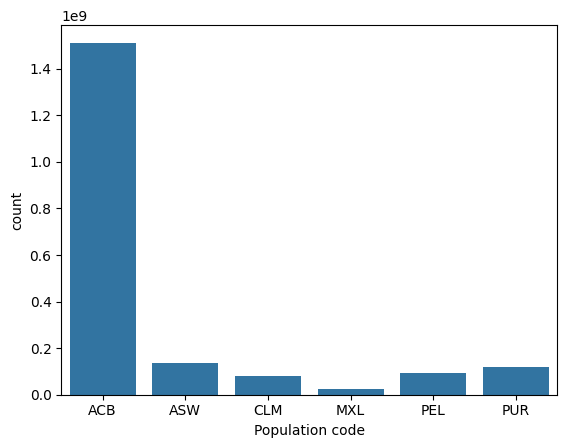

In [39]:
sns.barplot(plot, x="Population code", y="count")
plt.savefig("/home/oona/nsf_grfp/figs/seaborn_switch_plot.png")

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

fruits = ['apple', 'blueberry', 'cherry', 'orange']
counts = [40, 100, 30, 55]
bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('fruit supply')
ax.set_title('Fruit supply by kind and color')
ax.legend(title='Fruit color')

plt.show()